# Project Capstone

## Import Libraries

In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import numpy as np

## Data Wrangling

In [2]:
data = pd.read_csv("./data/data.csv")
data = pd.DataFrame(data)
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [4]:
data.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [5]:
data.fillna(value="None", inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [7]:
print("Jumlah duplikasi: ", data.duplicated().sum())

Jumlah duplikasi:  0


In [8]:
dataset = data.drop(columns=['Person ID', 'Occupation', 'Blood Pressure'])
dataset.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,6.1,6,42,6,Overweight,77,4200,None
1,Male,28,6.2,6,60,8,Normal,75,10000,None
2,Male,28,6.2,6,60,8,Normal,75,10000,None
3,Male,28,5.9,4,30,8,Obese,85,3000,Sleep Apnea
4,Male,28,5.9,4,30,8,Obese,85,3000,Sleep Apnea


In [ ]:
dataset.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


## Fitur Rekomendasi (Clustering)

### Kmeans

In [10]:
x_cluster = ['Quality of Sleep', 'Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Daily Steps']
data_selected = dataset[x_cluster]

label_encoders = {}
for column in data_selected.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data_selected[column] = label_encoders[column].fit_transform(data_selected[column])

In [11]:
scaler = StandardScaler()

In [12]:
clusters_result = {}

for feature in x_cluster:
    feature_data = data_selected[[feature]].values
    
    feature_scaled = scaler.fit_transform(feature_data)
    
    if feature == 'Quality of Sleep':
        n_clusters = 3
    else:
        n_clusters = 2
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(feature_scaled)
    
    cluster_centers = np.sort(kmeans.cluster_centers_.flatten())
    
    if feature == 'Stress Level':
        cluster_labels = {cluster: 'Baik' if center < 0 else 'Buruk'
                          for cluster, center in enumerate(cluster_centers)}
    elif feature == 'Quality of Sleep':
        cluster_labels = {0: 'Baik', 1: 'Cukup', 2: 'Buruk'}
    else:
        cluster_labels = {cluster: 'Baik' if center > 0 else 'Buruk'
                          for cluster, center in enumerate(cluster_centers)}
    
    labeled_clusters = [cluster_labels[cluster] for cluster in clusters]
    
    clusters_result[feature] = labeled_clusters

In [13]:
for feature, labels in clusters_result.items():
    dataset[f"{feature} Cluster"] = labels

dataset

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Quality of Sleep Cluster,Sleep Duration Cluster,Physical Activity Level Cluster,Stress Level Cluster,Daily Steps Cluster
0,Male,27,6.1,6,42,6,Overweight,77,4200,None,Cukup,Buruk,Buruk,Buruk,Baik
1,Male,28,6.2,6,60,8,Normal,75,10000,None,Cukup,Buruk,Buruk,Buruk,Buruk
2,Male,28,6.2,6,60,8,Normal,75,10000,None,Cukup,Buruk,Buruk,Buruk,Buruk
3,Male,28,5.9,4,30,8,Obese,85,3000,Sleep Apnea,Cukup,Buruk,Buruk,Buruk,Baik
4,Male,28,5.9,4,30,8,Obese,85,3000,Sleep Apnea,Cukup,Buruk,Buruk,Buruk,Baik
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,Baik,Baik,Baik,Baik,Buruk
370,Female,59,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,Baik,Baik,Baik,Baik,Buruk
371,Female,59,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,Baik,Baik,Baik,Baik,Buruk
372,Female,59,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,Baik,Baik,Baik,Baik,Buruk


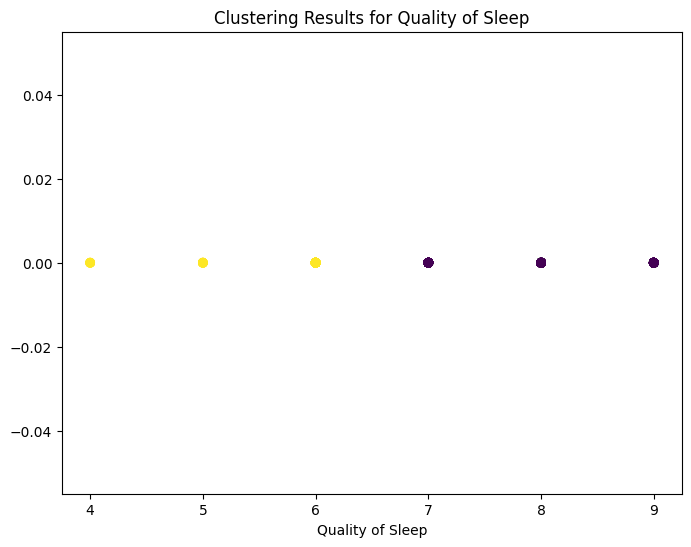

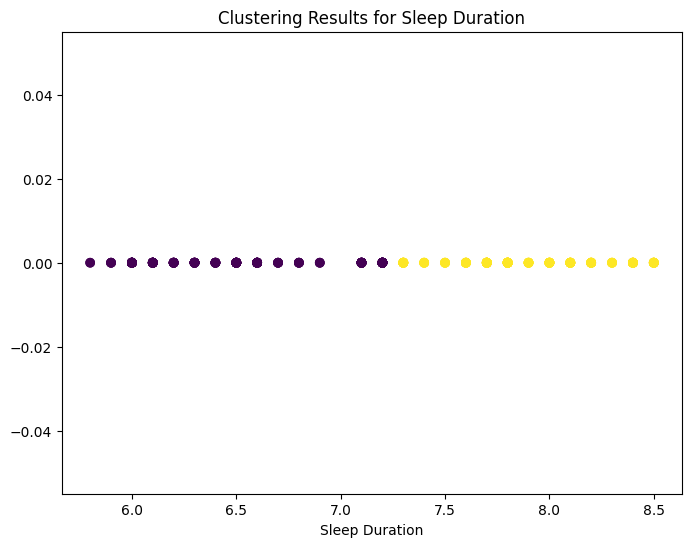

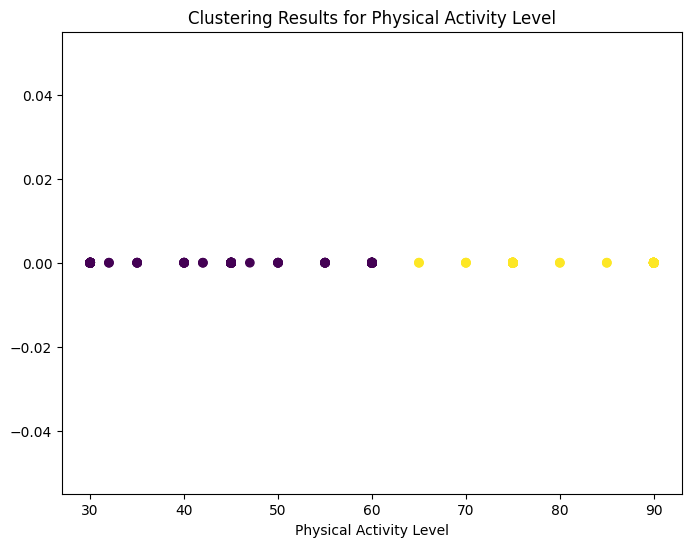

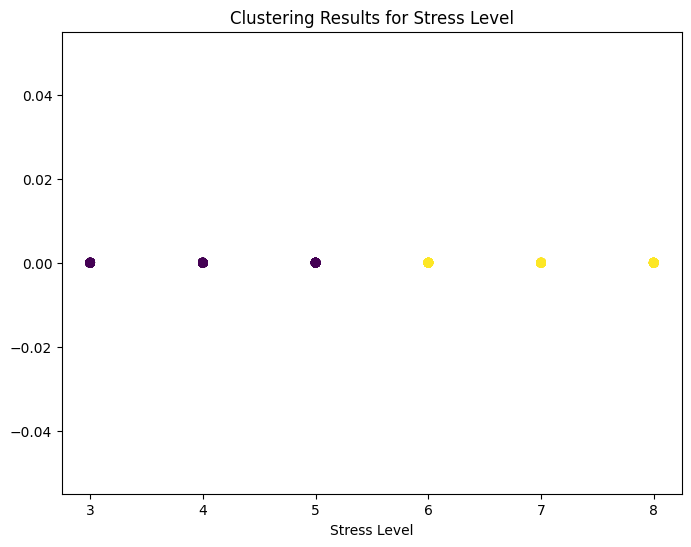

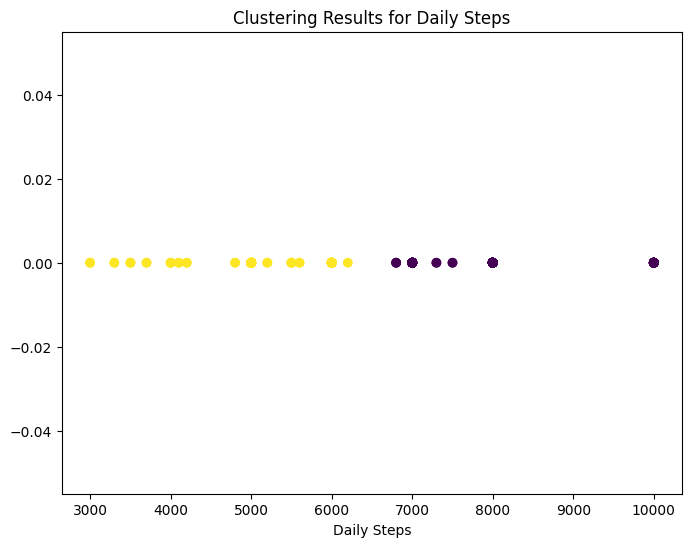

In [14]:
for feature in x_cluster:
    feature_data = data_selected[[feature]].values
    feature_scaled = scaler.fit_transform(feature_data)
    
    kmeans = KMeans(n_clusters=2, random_state=42)
    clusters = kmeans.fit_predict(feature_scaled)

    plt.figure(figsize=(8, 6))
    plt.scatter(feature_data, [0] * len(feature_data), c=clusters, cmap='viridis')
    plt.xlabel(feature)
    plt.title(f"Clustering Results for {feature}")
    plt.show()

In [15]:
def generate_recommendation(row):
    recommendations = []
    if row['Sleep Duration Cluster'] == 'Buruk':
        recommendations.append("Tingkatkan durasi tidur Anda.")
    if row['Physical Activity Level Cluster'] == 'Buruk':
        recommendations.append("Tingkatkan aktivitas fisik.")
    if row['Stress Level Cluster'] == 'Buruk':
        recommendations.append("Kurangi tingkat stres Anda.")
    if row['Daily Steps Cluster'] == 'Buruk':
        recommendations.append("Tambahkan langkah harian Anda.")
    return " | ".join(recommendations) if recommendations else "Semua sudah baik, pertahankan kebiasaan!"

dataset['Recommendation'] = dataset.apply(generate_recommendation, axis=1)

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Gender                           374 non-null    object 
 1   Age                              374 non-null    int64  
 2   Sleep Duration                   374 non-null    float64
 3   Quality of Sleep                 374 non-null    int64  
 4   Physical Activity Level          374 non-null    int64  
 5   Stress Level                     374 non-null    int64  
 6   BMI Category                     374 non-null    object 
 7   Heart Rate                       374 non-null    int64  
 8   Daily Steps                      374 non-null    int64  
 9   Sleep Disorder                   374 non-null    object 
 10  Quality of Sleep Cluster         374 non-null    object 
 11  Sleep Duration Cluster           374 non-null    object 
 12  Physical Activity Leve

## Data Encoding

In [17]:
label_encoders = {}
for column in dataset.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    dataset[column] = label_encoders[column].fit_transform(dataset[column])

In [18]:
dataset.describe()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Quality of Sleep Cluster,Sleep Duration Cluster,Physical Activity Level Cluster,Stress Level Cluster,Daily Steps Cluster,Recommendation
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,0.505348,42.184492,7.132086,7.312834,59.171123,5.385027,1.296791,70.165775,6816.844920,1.002674,0.831551,0.561497,0.617647,0.443850,0.561497,5.826203
std,0.500641,8.673133,0.795657,1.196956,20.830804,1.774526,1.431226,4.135676,1617.915679,0.644626,0.876239,0.496868,0.486613,0.497503,0.496868,2.827338
min,0.000000,27.000000,5.800000,4.000000,30.000000,3.000000,0.000000,65.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,35.250000,6.400000,6.000000,45.000000,4.000000,0.000000,68.000000,5600.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,1.000000,43.000000,7.200000,7.000000,60.000000,5.000000,0.000000,70.000000,7000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,6.000000
75%,1.000000,50.000000,7.800000,8.000000,75.000000,7.000000,3.000000,72.000000,8000.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,8.000000
max,1.000000,59.000000,8.500000,9.000000,90.000000,8.000000,3.000000,86.000000,10000.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,10.000000


## Split Data

In [19]:
x = dataset.drop(columns=['Quality of Sleep', 'Quality of Sleep Cluster', 'Sleep Duration Cluster', 'Physical Activity Level Cluster', 'Stress Level Cluster', 'Daily Steps Cluster', 'Recommendation'])
y = dataset[['Quality of Sleep', 'Quality of Sleep Cluster', 'Sleep Duration Cluster', 'Physical Activity Level Cluster', 'Stress Level Cluster', 'Daily Steps Cluster', 'Recommendation']]

In [20]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=42)

print("Training data size:", len(x_train))
print("Validation data size:", len(x_val))

print("\nTraining label size:", len(y_train))
print("Validation label size:", len(y_val))

Training data size: 261
Validation data size: 113

Training label size: 261
Validation label size: 113


In [21]:
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)

## Machine Learning

In [22]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs['val_mae'] <= 0.05 and epoch >= 250:
            print("Early stopping triggered at epoch ", epoch, " because validation MAE is less than 0.1")
            self.model.stop_training = True

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(y_train.shape[1], activation='linear')
])

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 7)              │            63 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,447 (13.46 KB)

 Trainable params: 3,447 (13.46 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_squared_error',
    metrics=['mae']
)

In [26]:
history = model.fit(x_train_scaled, y_train,
                    epochs=1000,
                    validation_data=(x_val_scaled, y_val),
                    batch_size=32,
                    callbacks=[CustomCallback()]
)

Epoch 1/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 14.4782 - mae: 2.3448 - val_loss: 14.1944 - val_mae: 2.3756
Epoch 2/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 13.7881 - mae: 2.3181 - val_loss: 13.7846 - val_mae: 2.3776
Epoch 3/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13.2995 - mae: 2.3167 - val_loss: 13.1920 - val_mae: 2.3850
Epoch 4/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 12.9738 - mae: 2.3732 - val_loss: 12.2570 - val_mae: 2.3857
Epoch 5/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11.9333 - mae: 2.3608 - val_loss: 11.0635 - val_mae: 2.3761
Epoch 6/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.5942 - mae: 2.3466 - val_loss: 9.7321 - val_mae: 2.3421
Epoch 7/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.4730 - mae: 2.3205 - val_loss: 8.4548 - val_mae: 2.2751
Epoch 8/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.2773 - mae: 2.2357 - val_loss: 7.3784 - val_mae: 2.1624
Epoch 9/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7

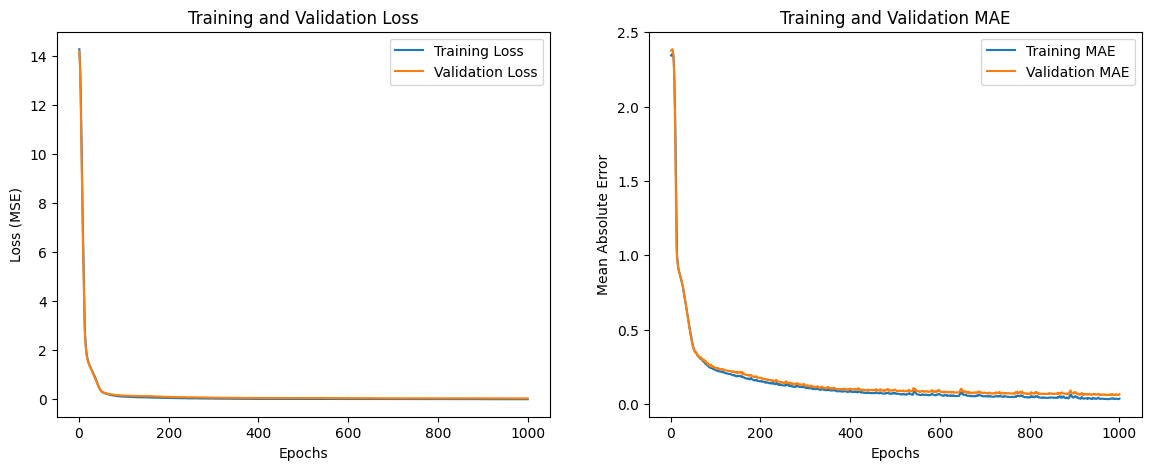

In [27]:
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()

# MAE plot
plt.subplot(1, 2, 2)
plt.plot(epochs, mae, label='Training MAE')
plt.plot(epochs, val_mae, label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.show()

In [28]:
predictions = model.predict(x_val_scaled)

print("Beberapa prediksi:")
for i in range(1):
    for j in range(y_train.shape[1]):
        feature_name = y_val.columns[j]
        rounded_pred = round(predictions[i][j])
        if feature_name in label_encoders:
            pred_original = label_encoders[feature_name].inverse_transform([rounded_pred])[0]
            actual_original = label_encoders[feature_name].inverse_transform([y_val.iloc[i, j]])[0]
        else:
            pred_original = predictions[i][j]
            actual_original = y_val.iloc[i, j]
        try:
            pred_original = float(pred_original)
            actual_original = float(actual_original)
            print(f"Prediksi untuk target {feature_name}: {pred_original:.2f}, Nilai aktual: {actual_original:.2f}")
        except ValueError:
            print(f"Prediksi untuk target {feature_name}: {pred_original}, Nilai aktual: {actual_original}")
    print()

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step
Beberapa prediksi:
Prediksi untuk target Quality of Sleep: 8.98, Nilai aktual: 9.00
Prediksi untuk target Quality of Sleep Cluster: Baik, Nilai aktual: Baik
Prediksi untuk target Sleep Duration Cluster: Baik, Nilai aktual: Baik
Prediksi untuk target Physical Activity Level Cluster: Buruk, Nilai aktual: Buruk
Prediksi untuk target Stress Level Cluster: Baik, Nilai aktual: Baik
Prediksi untuk target Daily Steps Cluster: Baik, Nilai aktual: Baik
Prediksi untuk target Recommendation: Tingkatkan aktivitas fisik., Nilai aktual: Tingkatkan aktivitas fisik.



In [30]:
predictions = model.predict(x_val_scaled)

print("Beberapa prediksi pertama:")
for i in range(1):
    for j in range(y_train.shape[1]):
        print(f"Prediksi untuk target {y_val.columns[j]}: {predictions[i][j]:.2f}, Nilai aktual: {y_val.iloc[i, j]:.2f}")
    print()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Beberapa prediksi pertama:
Prediksi untuk target Quality of Sleep: 8.98, Nilai aktual: 9.00
Prediksi untuk target Quality of Sleep Cluster: -0.04, Nilai aktual: 0.00
Prediksi untuk target Sleep Duration Cluster: 0.01, Nilai aktual: 0.00
Prediksi untuk target Physical Activity Level Cluster: 1.04, Nilai aktual: 1.00
Prediksi untuk target Stress Level Cluster: 0.01, Nilai aktual: 0.00
Prediksi untuk target Daily Steps Cluster: 0.03, Nilai aktual: 0.00
Prediksi untuk target Recommendation: 4.04, Nilai aktual: 4.00



## Save Model

In [31]:
model.save('model_1_fix.h5')

In [32]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model_1_fix.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\adidy\AppData\Local\Temp\tmpwgzt8gk2\assets


INFO:tensorflow:Assets written to: C:\Users\adidy\AppData\Local\Temp\tmpwgzt8gk2\assets


Saved artifact at 'C:\Users\adidy\AppData\Local\Temp\tmpwgzt8gk2'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 9), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  2366270393616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2366270390928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2366270394960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2366270396496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2366270395344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2366270391888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2366270393808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2366270396880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2366270396304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2366270397648: TensorSpec(shape=(), dtype=tf.resource, name=None)


## Load Model

In [33]:
loaded_model = tf.keras.models.load_model('model_1_fix.h5')

In [34]:
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 7)              │            63 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,449 (13.48 KB)

 Trainable params: 3,447 (13.46 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [35]:
predictions = loaded_model.predict(x_val_scaled)

print("Beberapa prediksi:")
for i in range(1):
    for j in range(y_train.shape[1]):
        feature_name = y_val.columns[j]
        rounded_pred = round(predictions[i][j])
        if feature_name in label_encoders:
            pred_original = label_encoders[feature_name].inverse_transform([rounded_pred])[0]
            actual_original = label_encoders[feature_name].inverse_transform([y_val.iloc[i, j]])[0]
        else:
            pred_original = predictions[i][j]
            actual_original = y_val.iloc[i, j]
        try:
            pred_original = float(pred_original)
            actual_original = float(actual_original)
            print(f"Prediksi untuk target {feature_name}: {pred_original:.2f}, Nilai aktual: {actual_original:.2f}")
        except ValueError:
            print(f"Prediksi untuk target {feature_name}: {pred_original}, Nilai aktual: {actual_original}")
    print()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Beberapa prediksi:
Prediksi untuk target Quality of Sleep: 8.98, Nilai aktual: 9.00
Prediksi untuk target Quality of Sleep Cluster: Baik, Nilai aktual: Baik
Prediksi untuk target Sleep Duration Cluster: Baik, Nilai aktual: Baik
Prediksi untuk target Physical Activity Level Cluster: Buruk, Nilai aktual: Buruk
Prediksi untuk target Stress Level Cluster: Baik, Nilai aktual: Baik
Prediksi untuk target Daily Steps Cluster: Baik, Nilai aktual: Baik
Prediksi untuk target Recommendation: Tingkatkan aktivitas fisik., Nilai aktual: Tingkatkan aktivitas fisik.

